In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [10]:
df = pd.read_csv('dataset/gold_price_data.csv')

In [11]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
df.shape

(2290, 6)

In [13]:
df.sample(1).iloc[0]

Date         7/2/2008
SPX        1261.52002
GLD         93.169998
USO        116.839996
SLV            18.215
EUR/USD      1.570007
Name: 110, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
# statistical insights of data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
# checking null values

df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
df[df.duplicated]   # no duplicates

,Date,SPX,GLD,USO,SLV,EUR/USD


## Data Visualization

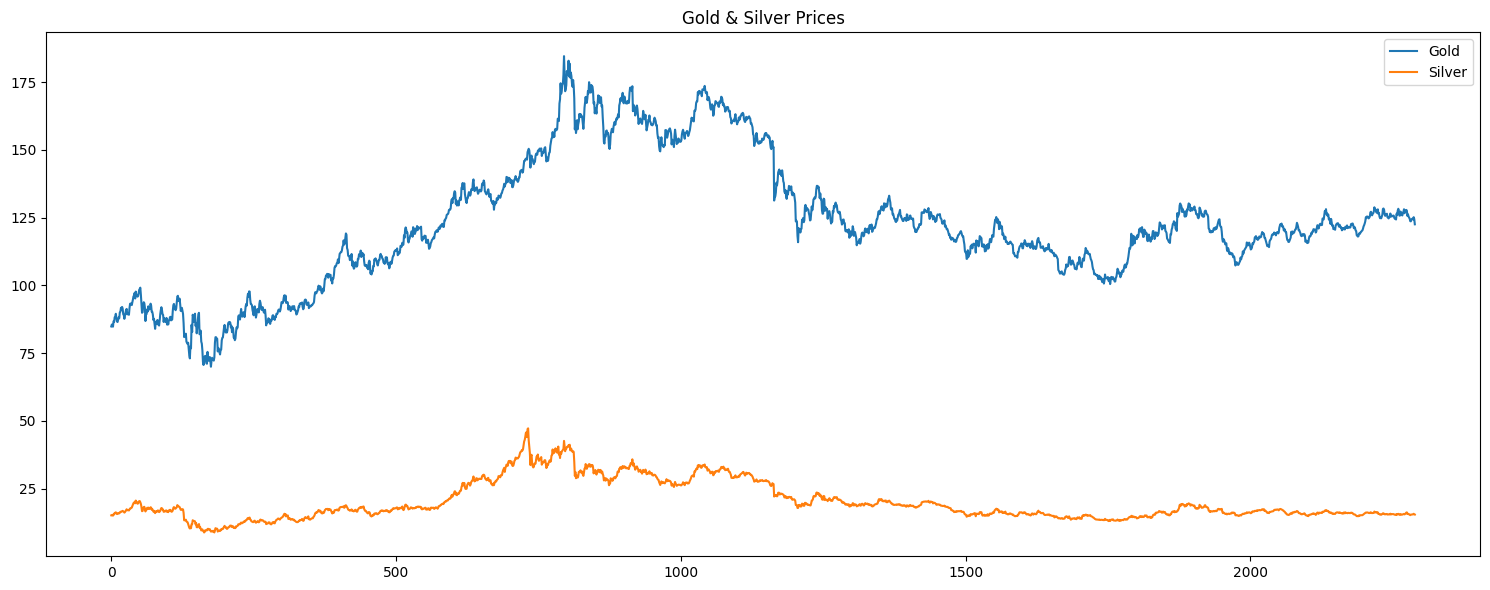

In [18]:
plt.figure(figsize=(15 ,6))
df['GLD'].plot()
df['SLV'].plot()
plt.xlabel(None)
plt.ylabel(None)
plt.title("Gold & Silver Prices")
plt.legend(['Gold', 'Silver'])
plt.tight_layout()
plt.show()

<Axes: xlabel='GLD', ylabel='Density'>

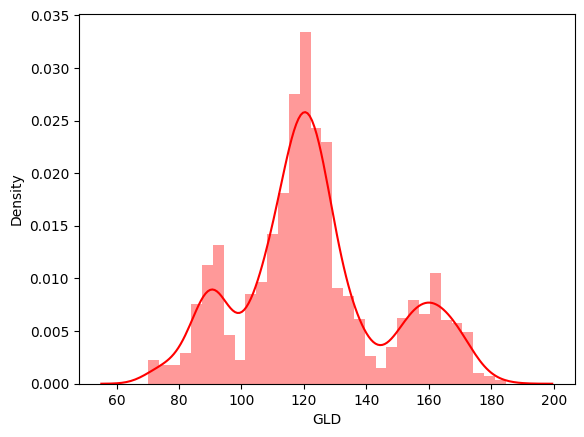

In [19]:
sns.distplot(df['GLD'], color='red')

In [20]:
# feature and target variable

X = df.drop(['Date', 'GLD'], axis=1)
y = df['GLD']

In [21]:
# spliting train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [22]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
prediction = model.predict(X_test)
prediction

array([168.4767991 ,  82.05819992, 116.17829989, 127.69500087,
       120.74420142, 154.72449747, 150.24759795, 126.01090077,
       117.44839871, 125.8391009 , 116.71480083, 171.50560103,
       141.65269826, 167.9681991 , 115.13490003, 117.23270052,
       135.72130373, 170.13640066, 158.96480306, 156.37489896,
       155.20320031, 125.25180045, 175.36960048, 156.90890292,
       125.22630034,  94.18079958,  77.7423002 , 120.61179998,
       119.09219964, 167.25950042,  87.96440032, 125.02080036,
        91.29960057, 117.8486999 , 121.04049909, 136.48110056,
       115.39890106, 114.99830076, 147.20399945, 107.00040119,
       104.82060254,  87.18079787, 126.49110055, 118.15569976,
       153.4911992 , 119.63490002, 108.48379977, 107.96699783,
        93.06600062, 127.23489755,  74.8497003 , 113.78529923,
       121.09830007, 111.30349888, 118.81889895, 120.68669931,
       159.86700006, 168.39300111, 147.03729719,  85.80899851,
        94.28780038,  86.82659876,  90.6623001 , 119.08

In [24]:
# r_squared error 

r2se =  metrics.r2_score(y_test, prediction)
print(f'The Value of R Squared Error : {r2se}')

The Value of R Squared Error : 0.9892623958805582


In [25]:
# mean squared error 

mse = metrics.mean_squared_error(y_test, prediction)
print(f'The Value of Mean squared Error: {mse}')

The Value of Mean squared Error: 5.663479505390881


### Visuals of Actual vs Predicted Prices  (y vs ŷ)

In [26]:
y_test = list(y_test)

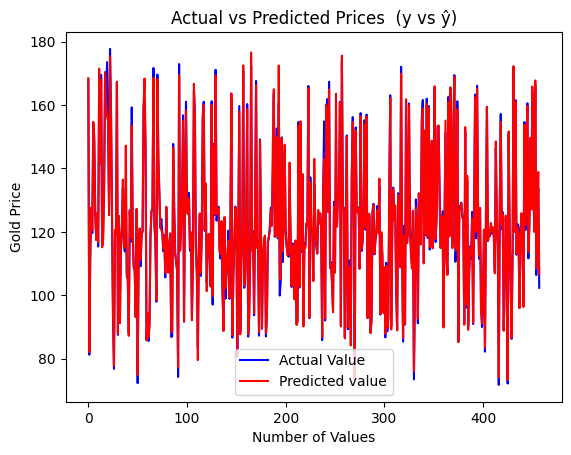

In [27]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(prediction, color='red', label='Predicted value')
plt.title('Actual vs Predicted Prices  (y vs ŷ)')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [28]:
# That's it >>